# Introduction into Data Science - Assignment Part II

This is the second part of the assignment in IDS 2023/2024.

This part of the assignment consists of five questions — each of these questions is contained in a separate Jupyter notebook:
- [Question 1: Data Preprocessing](Q1_Preprocessing_Visualization.ipynb)
- [Question 2: Association Rules](Q2_Frequent_Itemsets_Association_Rules.ipynb)
- [Question 3: Process Mining](Q3_Process_Mining.ipynb)
- [Question 4: Text Mining](Q4_Text_Mining.ipynb)
- [Question 5: Big Data](Q5_Big_Data.ipynb)

Additional required files are in two folders.
- [datasets](datasets/)
- [scripts](scripts/)

Please use the provided notebook to work on the questions. When you are done, upload your version of each of the notebooks to Moodle. Your submission will, therefore, consist of five jupyter notebook and _no_ additional file. Any additionally provided files will not be considered in grading.
Enter your commented Python code and answers in the corresponding cells. Make sure to answer all questions in a clear and explicit manner and discuss your outputs. _Please do not change the general structure of this notebook_. You can, however, add additional markdown or code cells if necessary. Please **DO NOT CLEAR THE OUTPUT** of the notebook you are submitting! Additionally, please ensure that the code in the notebook runs if placed in the same folder as all of the provided files, delivering the same outputs as the ones you submit in the notebook. This includes being runnable in the bundled conda environment.

*Please make sure to include the names and matriculation numbers of all group members in the provided slots in each of the notebooks.* If a name or a student id is missing, the student will not receive any points.

Hint 1: **Plan your time wisely.** A few parts of this assignment may take some time to run. It might be necessary to consider time management when you plan your group work. Also, do not attempt to upload your assignment at the last minute before the deadline. This often does not work, and you will miss the deadline. Late submissions will not be considered.

Hint 2: RWTHMoodle allows multiple submissions, with every new submission overwriting the previous one. **Partial submissions are possible and encouraged.** This might be helpful in case of technical issues with RWTHMoodle, which may occur close to the deadline.

Hint 3: As a technical note. Some IDEs such as DataSpell may automatically strip jupyter notebook cell metadata. If you are able, please re-add it from the source notebooks before submission. This is necessary for our grading.

Enter your group number and members with matriculation numbers below.

In [ ]:
GROUP_NO = 123 # group number
GROUP_MEMBERS = {
    433440: "Tianjun Chen", # mat. no. : name,
    440132: "Rami Qudah",
    345678: "firstname lastname",
}

---

In [4]:
# required imports
# do not edit!

import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.impute import KNNImputer

# Question 1: Preprocessing and Visualization (19 Points)

**About the Data: Heart Disease**

In this task, our data (`q1_heart_disease.csv`) contains records related to the diagnosis of heart disease in patients. It includes various clinical and non-clinical attributes used to determine the presence or absence of heart disease. Columns cover aspects like patient demographics, vital signs, symptoms, and potential risk factors associated with heart conditions. See below a short description for each column.

| Column         | Description                                                                                                                       |
|----------------|-----------------------------------------------------------------------------------------------------------------------------------|
| Age            | The age of the patient in years.                                                                                                  |
| Sex            | The sex of the patient.                                                                                                           |
| ChestPainType  | The type of chest pain (TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomnic).                       |
| RestingBP      | The resting blood pressure in millimeter of mercury [mmHg].                                                                       |
| Cholesterol    | The cholesterol of the blood serum in milligrams per deciliter (mg/dl).                                                           |
| FastingBS      | 1 if the blood sugar while fasting is above 120 mg/dl, 0 otherwise.                                                               |
| RestingECG     | Results of the electrocardiogram when resting.                                                                                    |
| MaxHR          | The maximum heart rate achieved while exercising.                                                                                 |
| ExerciseAngina | If an Angina (pressure on chest) is inducible by exercising.                                                                      |
| Oldpeak        | Numerical measure of the depression of the ST segment of electrocardiogram induced by exercise relative to rest.                  |
| ST_Slope       | The slope of the peak exercise ST segment, where 0 corresponds to downsloping; 1 to a flat level, and 2 corresponds to upsloping. |
| HeartDisease   | Heart disease being present or not.                                                                                               |

## Part I: Preprocessing (11 pts)

### a)
First things first. Import the file **q1_heart_disease.csv** and save it into a dataframe named `heart_df`. Visualize the dataframe by showing the first five lines. 


In [130]:
# Import and visualization.
heart_df = pd.read_csv('datasets/q1_heart_disease.csv')
display(heart_df.head())

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40.0,M,ATA,140.0,289.0,0.0,Normal,172.0,N,0.0,Up,0.0
1,49.0,F,NAP,160.0,180.0,0.0,Normal,156.0,N,1.0,Flat,1.0
2,37.0,M,ATA,130.0,283.0,0.0,ST,98.0,N,0.0,Up,0.0
3,48.0,F,ASY,138.0,214.0,0.0,Normal,108.0,Y,1.5,Flat,1.0
4,54.0,M,NAP,150.0,195.0,0.0,Normal,122.0,N,0.0,Up,0.0


### b) 
i. Check the data types. Are there any data type problems (e.g., numerical columns having a non-numerical data type)?

In [131]:
# Visualizing data types
print(heart_df.dtypes)

Age               float64
Sex                object
ChestPainType      object
RestingBP         float64
Cholesterol       float64
FastingBS         float64
RestingECG         object
MaxHR             float64
ExerciseAngina     object
Oldpeak           float64
ST_Slope           object
HeartDisease      float64
dtype: object


ii. Fix problems, if there are any data type problems. Further, improve categorical columns by setting them to the categorical type and translate boolean columns to boolean values.

In [ ]:
# Fixing problems, if necessary
# Not Necessary

In [132]:
# Set categorical columns to categori*c*al type.
categorical_columns = ['ChestPainType', 'RestingECG', 'ST_Slope', 'Sex']
heart_df[categorical_columns] = heart_df[categorical_columns].astype('category')

In [133]:
# Translate boolean columns to boolean type
boolean_columns = ['FastingBS', 'HeartDisease']
heart_df[boolean_columns] = heart_df[boolean_columns].astype(bool)
heart_df['ExerciseAngina'] = heart_df['ExerciseAngina'].map({'Y': True, 'N': False})
heart_df['ExerciseAngina'] = heart_df['ExerciseAngina'].astype(bool)

In [134]:
# Checking again by visualizing data types
display(heart_df.head())
print(heart_df.dtypes)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40.0,M,ATA,140.0,289.0,False,Normal,172.0,False,0.0,Up,False
1,49.0,F,NAP,160.0,180.0,False,Normal,156.0,False,1.0,Flat,True
2,37.0,M,ATA,130.0,283.0,False,ST,98.0,False,0.0,Up,False
3,48.0,F,ASY,138.0,214.0,False,Normal,108.0,True,1.5,Flat,True
4,54.0,M,NAP,150.0,195.0,False,Normal,122.0,False,0.0,Up,False


Age                float64
Sex               category
ChestPainType     category
RestingBP          float64
Cholesterol        float64
FastingBS             bool
RestingECG        category
MaxHR              float64
ExerciseAngina        bool
Oldpeak            float64
ST_Slope          category
HeartDisease          bool
dtype: object


### c)
i. In this subtask, we start with a first evaluation of our data by checking the plausibility of some entries. To make sure that we do not have a clash between intended NaN values and existing NaN values in the dataset, we first remove all NaN values. Report the number of rows containing a NaN value.

In [135]:
nan_rows = heart_df.isnull().any(axis=1).sum()
heart_df = heart_df.dropna()
nan_rows_post = heart_df.isnull().any(axis=1).sum()
print(f"Number of rows containing NaN values before removal: {nan_rows}")
print(f"Number of rows containing NaN values after removal: {nan_rows_post}")

Number of rows containing NaN values before removal: 2
Number of rows containing NaN values after removal: 0


ii. To check plausibility, create boxplots for all numerical features. Reason which features have invalid or missing values. Show and report such outliers. 

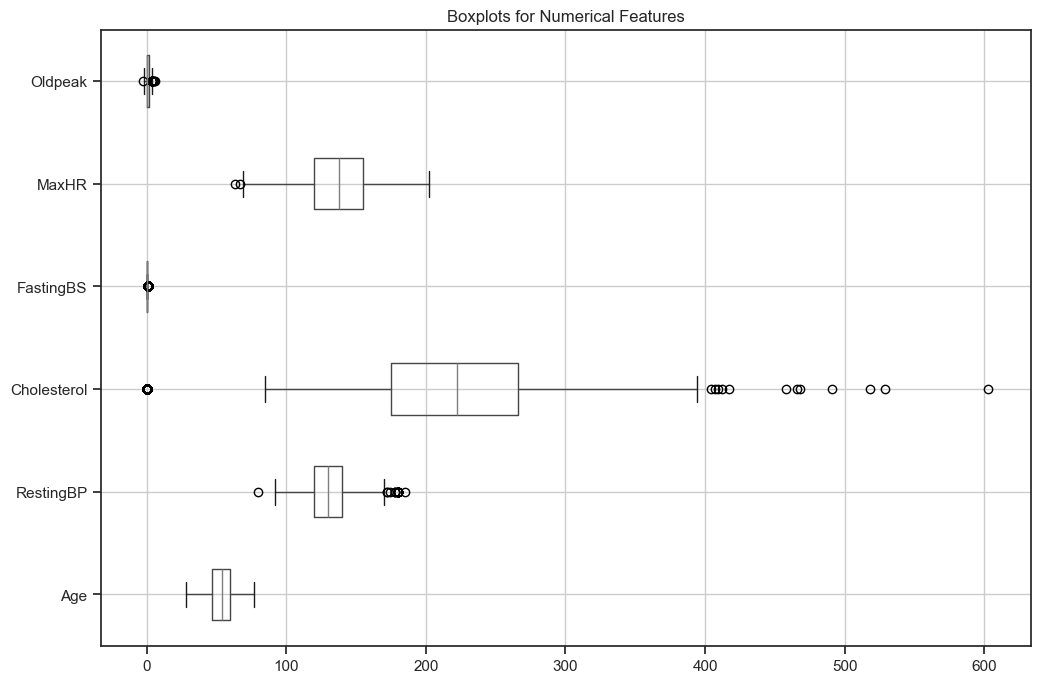

In [157]:
# Creating the boxplot and calculating outliers
numnum = heart_df.select_dtypes(include=['float64']).columns
heart_df[numnum].boxplot(figsize=(12, 8), vert=False)
plt.title('Boxplots for Numerical Features')
plt.show()

_Note: There may be more cells than what you may need for viewing and reporting the entries properly and nicely._

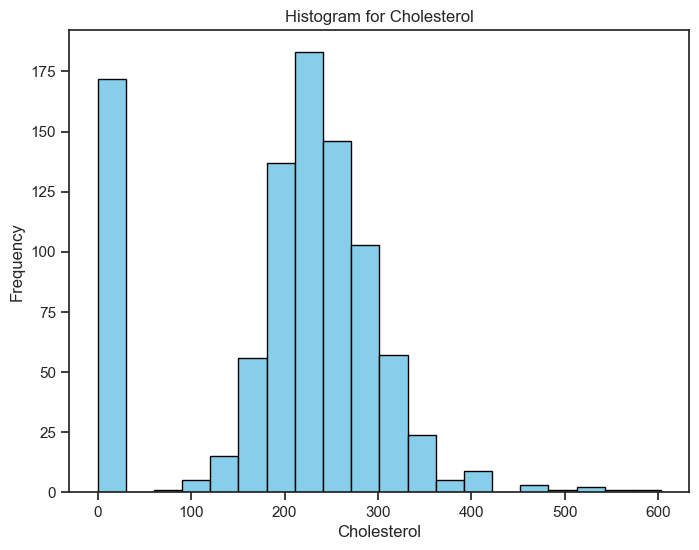

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
77,32.0,M,ASY,118.0,529.0,False,Normal,130.0,False,0.0,Flat,True
151,54.0,M,ASY,130.0,603.0,True,Normal,125.0,True,1.0,Flat,True
621,67.0,F,NAP,115.0,564.0,False,LVH,160.0,False,1.6,Flat,False


In [137]:
# Potential viewing and reporting of outlier entries
feature= 'Cholesterol'
column_data_type = heart_df[feature].dtype
plt.figure(figsize=(8, 6))
plt.hist(heart_df[feature].dropna(), bins=20, color='skyblue', edgecolor='black')
plt.title(f'Histogram for {feature}')
plt.xlabel(feature)
plt.ylabel('Frequency')
plt.show()
z_scores = np.abs((heart_df[feature] - heart_df[feature].mean()) / heart_df[feature].std())

outlier_rows = heart_df[z_scores > 3]
display(outlier_rows)

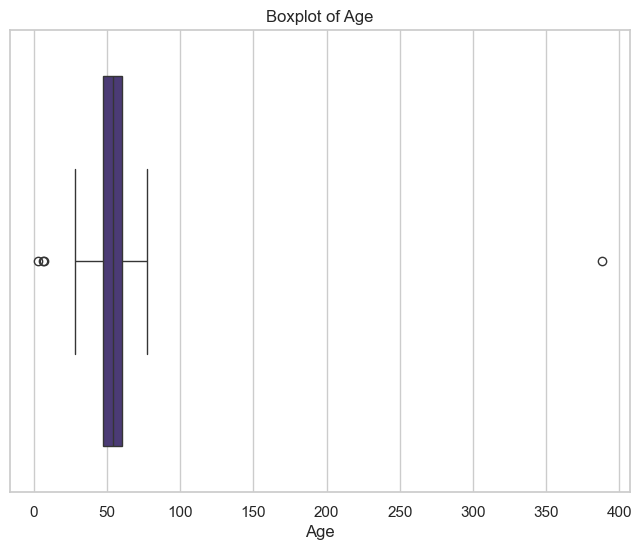

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
8,7.0,F,ATA,145.0,207.0,True,Normal,130.0,False,1.5,Flat,True
92,6.0,M,ASY,140.0,139.0,False,Normal,140.0,False,0.0,Up,False
339,3.0,M,ASY,95.0,0.0,True,Normal,145.0,False,1.1,Down,True
597,388.0,M,ASY,160.0,256.0,True,ST,136.0,False,0.2,Up,False


In [138]:
# Potential viewing and reporting of outlier entries
feature = 'Age' 
sns.set(style='whitegrid', palette='viridis')
plt.figure(figsize=(8, 6))
sns.boxplot(x=heart_df[feature])
plt.xlabel(feature)
plt.title(f'Boxplot of {feature}')
plt.show()
z_scores = np.abs((heart_df[feature] - heart_df[feature].mean()) / heart_df[feature].std())
outlier_rows = heart_df[z_scores > 2]
display(outlier_rows)

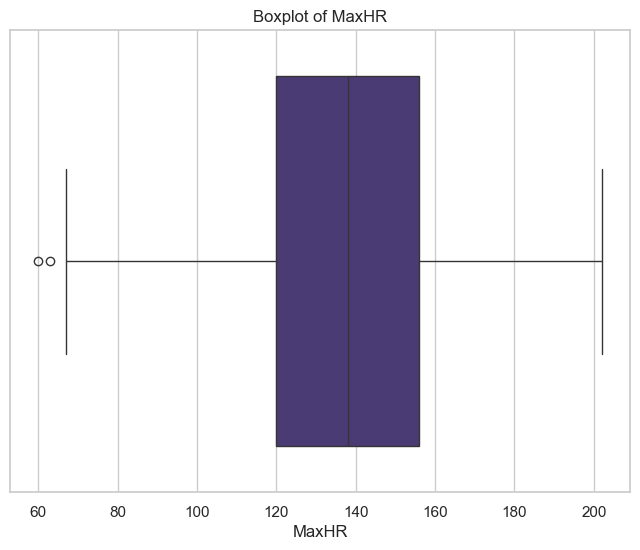

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
393,51.0,M,ASY,140.0,0.0,False,Normal,60.0,False,0.0,Flat,True


In [106]:
# Potential viewing and reporting of outlier entries
feature = 'MaxHR' 
sns.set(style='whitegrid', palette='viridis')
plt.figure(figsize=(8, 6))
sns.boxplot(x=heart_df[feature])
plt.xlabel(feature)
plt.title(f'Boxplot of {feature}')
plt.show()
z_scores = np.abs((heart_df[feature] - heart_df[feature].mean()) / heart_df[feature].std())
outlier_rows = heart_df[z_scores > 3]
display(outlier_rows)

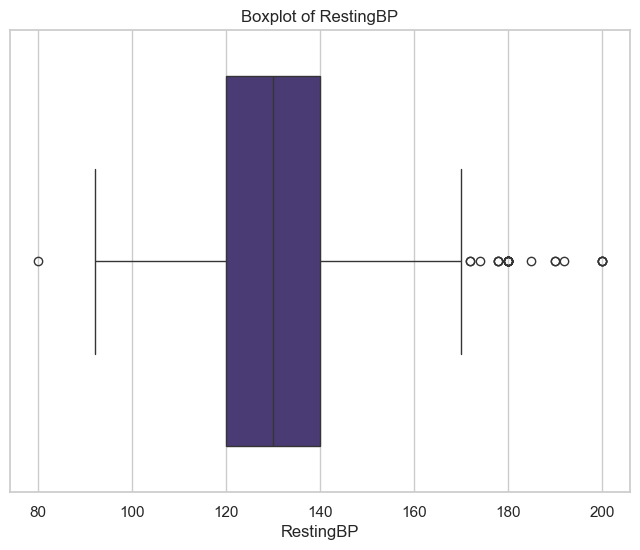

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
111,39.0,M,ATA,190.0,241.0,False,Normal,106.0,False,0.0,Up,False
243,54.0,M,ASY,200.0,198.0,False,Normal,142.0,True,2.0,Flat,True
368,64.0,F,ASY,200.0,0.0,False,Normal,140.0,True,1.0,Flat,True
402,61.0,M,NAP,200.0,0.0,True,ST,70.0,False,0.0,Flat,True
596,61.0,M,ASY,190.0,287.0,True,LVH,150.0,True,2.0,Down,True
737,56.0,F,ASY,200.0,288.0,True,LVH,133.0,True,4.0,Down,True
764,54.0,M,ATA,192.0,283.0,False,LVH,195.0,False,0.0,Up,True


In [107]:
# Potential viewing and reporting of outlier entries
feature= 'RestingBP'
sns.set(style='whitegrid', palette='viridis')
plt.figure(figsize=(8, 6))
sns.boxplot(x=heart_df[feature])
plt.xlabel(feature)
plt.title(f'Boxplot of {feature}')
plt.show()
z_scores = np.abs((heart_df[feature] - heart_df[feature].mean()) / heart_df[feature].std())
outlier_rows = heart_df[z_scores > 3]
display(outlier_rows)

iii. Decide and briefly reason which entries can be kept such that some values can be imputed later and which entries have to be deleted. Apply the preprocessing by either deleting entries or by replacing values that should be imputed by setting their value to NaN respectively. Report for both processings how many entries are effected.

__Student Answer:__ 
Due to a lack of domain knowledge some of these conclusions may be invalid. Comparing the outliers to the values of other features gives insight on weather to impute or remove them:

1. Cholesterol: Rows 75 and 121 are to be imputed. Row 621 is to be removed since it is implausable that someone without heart diseas and healthy signs can possess such a cholesterol level.
2. Age: 8 and 597 are to be imputed. 339 and 92 are to be removed as it is unlikely that signs so healthy have heart disease or such a low RestingHR.
3. MaxHR: 393 is to be removed.
4. Resting BP: 111, 402, 764 are to be removed due to unlikeliness. 243, 368, 596, 737 are to be imputed

In [139]:
# Potential removing of outliers, reporting their number, and showing of the resulting dataframe
print("Rows 339, 92, 111, 402, 764, 393, 621 are to be removed")
delete= [339, 92, 111, 402, 764, 393, 621]
heart_df = heart_df.drop(delete)
display(heart_df)


Rows 339, 92, 111, 402, 764, 393, 621 are to be removed


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40.0,M,ATA,140.0,289.0,False,Normal,172.0,False,0.0,Up,False
1,49.0,F,NAP,160.0,180.0,False,Normal,156.0,False,1.0,Flat,True
2,37.0,M,ATA,130.0,283.0,False,ST,98.0,False,0.0,Up,False
3,48.0,F,ASY,138.0,214.0,False,Normal,108.0,True,1.5,Flat,True
4,54.0,M,NAP,150.0,195.0,False,Normal,122.0,False,0.0,Up,False
...,...,...,...,...,...,...,...,...,...,...,...,...
918,45.0,M,TA,110.0,264.0,False,Normal,132.0,False,1.2,Flat,True
919,68.0,M,ASY,144.0,193.0,True,Normal,141.0,False,3.4,Flat,True
920,57.0,M,ASY,130.0,131.0,False,Normal,115.0,True,1.2,Flat,True
921,57.0,F,ATA,130.0,236.0,False,LVH,174.0,False,0.0,Flat,True


In [140]:
# Potential replacing of values with NaN, reporting their number, and showing of the resulting dataframe
row_index = [8, 597]
heart_df.loc[heart_df.index.isin(row_index), 'Age'] = np.nan
row_index = [243, 368, 596, 737]
heart_df.loc[heart_df.index.isin(row_index), 'RestingBP'] = np.nan
row_index = [75, 121]
heart_df.loc[heart_df.index.isin(row_index), 'Cholesterol'] = np.nan
nan_rows = heart_df[heart_df.isna().any(axis=1)]
display (nan_rows)



,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
8,NaN,F,ATA,145.0,207.0,True,Normal,130.0,False,1.5,Flat,True
75,55.0,M,ASY,140.0,NaN,False,Normal,128.0,True,1.5,Flat,True
121,34.0,M,TA,140.0,NaN,False,Normal,180.0,False,0.0,Flat,True
243,54.0,M,ASY,NaN,198.0,False,Normal,142.0,True,2.0,Flat,True
368,64.0,F,ASY,NaN,0.0,False,Normal,140.0,True,1.0,Flat,True
596,61.0,M,ASY,NaN,287.0,True,LVH,150.0,True,2.0,Down,True
597,NaN,M,ASY,160.0,256.0,True,ST,136.0,False,0.2,Up,False
737,56.0,F,ASY,NaN,288.0,True,LVH,133.0,True,4.0,Down,True


iv. To give yourself a better insight, plot the resulting dataframe again using boxplots.

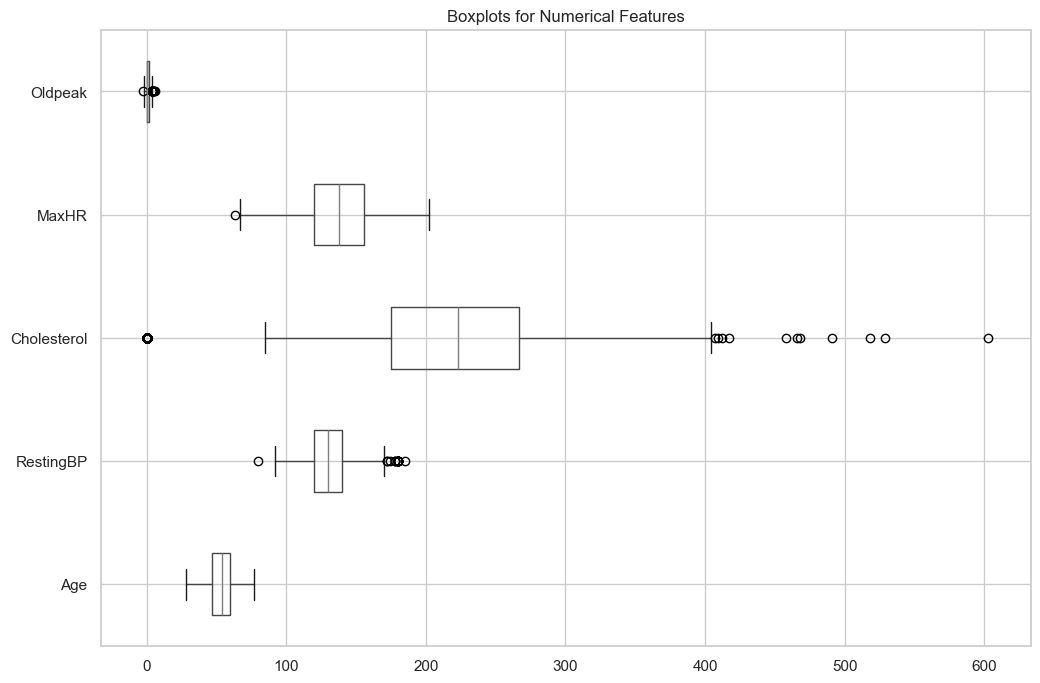

In [110]:
# Creating a boxplot
numnum = heart_df.select_dtypes(include=['float64']).columns
heart_df[numnum].boxplot(figsize=(12, 8), vert=False)
plt.title('Boxplots for Numerical Features')
plt.show()

### d)
In this task, we apply one-hot encoding for all categorical and all boolean features. This is used later for visualization. Afterwards, show the resulting dataframe.

In [141]:
# Replacing categorical and boolean features with one-hot encoded columns
categorical_columns = heart_df.select_dtypes(include=['category']).columns
boolean_columns = heart_df.select_dtypes(include=['bool']).columns
to_encode = list(categorical_columns) + list(boolean_columns)
heart_df1 = pd.get_dummies(heart_df, columns=to_encode)
display(heart_df1.head())

,Age,RestingBP,Cholesterol,MaxHR,Oldpeak,Sex_F,Sex_M,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,...,RestingECG_ST,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up,FastingBS_False,FastingBS_True,ExerciseAngina_False,ExerciseAngina_True,HeartDisease_False,HeartDisease_True
0,40.0,140.0,289.0,172.0,0.0,False,True,False,True,False,...,False,False,False,True,True,False,True,False,True,False
1,49.0,160.0,180.0,156.0,1.0,True,False,False,False,True,...,False,False,True,False,True,False,True,False,False,True
2,37.0,130.0,283.0,98.0,0.0,False,True,False,True,False,...,True,False,False,True,True,False,True,False,True,False
3,48.0,138.0,214.0,108.0,1.5,True,False,True,False,False,...,False,False,True,False,True,False,False,True,False,True
4,54.0,150.0,195.0,122.0,0.0,False,True,False,False,True,...,False,False,False,True,True,False,True,False,True,False


### e)
i. In this task, we want to impute missing values based on their k-nearest neighbor. Therefore, as a first step, create a reduced dataframe that contains the column(s) with missing values and with columns that correlate with the missing value. To decide which features (weakly) correlate, consider the correlation matrix in the figure below that is taken from literature (Source: https://www.ncbi.nlm.nih.gov/pmc/articles/PMC10417090/). Consider all features that have an absolute value for the correlation coefficient of at least 0.1 with the missing value.

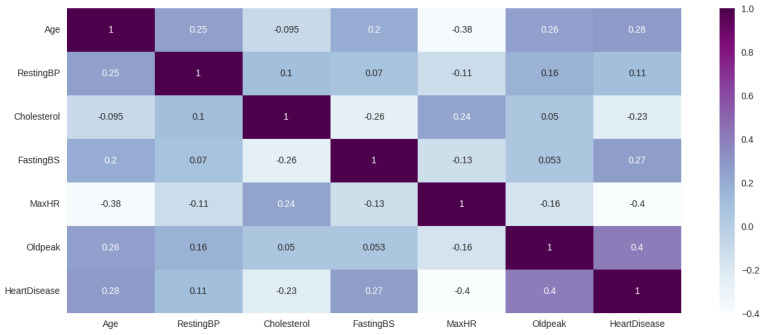

Figure 1: Correlation matrix between different features from Literature. (Source: https://www.ncbi.nlm.nih.gov/pmc/articles/PMC10417090/)

In [142]:
impute_df = heart_df[heart_df.isna().any(axis=1)]
keep = ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'FastingBS', 'Oldpeak', 'HeartDisease']
impute_df = impute_df.drop(columns=[col for col in impute_df.columns if col not in keep])
display(impute_df)


,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
8,NaN,145.0,207.0,True,130.0,1.5,True
75,55.0,140.0,NaN,False,128.0,1.5,True
121,34.0,140.0,NaN,False,180.0,0.0,True
243,54.0,NaN,198.0,False,142.0,2.0,True
368,64.0,NaN,0.0,False,140.0,1.0,True
596,61.0,NaN,287.0,True,150.0,2.0,True
597,NaN,160.0,256.0,True,136.0,0.2,False
737,56.0,NaN,288.0,True,133.0,4.0,True


__Student Answer:__ _your answer goes here_

ii. Next, use k-nearest neighbor imputation with $k = 5$. Impute the missing values. Update the dataframe `heart_df`.

In [145]:
# Applying k-nearest neighbor imputation
knn_imputer = KNNImputer(n_neighbors=5)
imputed_df = pd.DataFrame(knn_imputer.fit_transform(impute_df), columns=impute_df.columns)
imputed_df['HeartDisease'] = imputed_df['HeartDisease'].astype(bool)
display(imputed_df)

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
0,52.0,145.00,207.0,1.0,130.0,1.5,True
1,55.0,140.00,189.8,0.0,128.0,1.5,True
2,34.0,140.00,189.6,0.0,180.0,0.0,True
3,54.0,146.25,198.0,0.0,142.0,2.0,True
4,64.0,146.25,0.0,0.0,140.0,1.0,True
5,61.0,146.25,287.0,1.0,150.0,2.0,True
6,52.0,160.00,256.0,1.0,136.0,0.2,False
7,56.0,146.25,288.0,1.0,133.0,4.0,True


In [148]:
# Updating the imputed column(s)
heart_df.update(imputed_df)
display(heart_df)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,52.0,M,ATA,145.00,207.0,1.0,Normal,130.0,False,1.5,Up,True
1,55.0,F,NAP,140.00,189.8,0.0,Normal,128.0,False,1.5,Flat,True
2,34.0,M,ATA,140.00,189.6,0.0,ST,180.0,False,0.0,Up,True
3,54.0,F,ASY,146.25,198.0,0.0,Normal,142.0,True,2.0,Flat,True
4,64.0,M,NAP,146.25,0.0,0.0,Normal,140.0,False,1.0,Up,True
...,...,...,...,...,...,...,...,...,...,...,...,...
918,45.0,M,TA,110.00,264.0,0.0,Normal,132.0,False,1.2,Flat,True
919,68.0,M,ASY,144.00,193.0,1.0,Normal,141.0,False,3.4,Flat,True
920,57.0,M,ASY,130.00,131.0,0.0,Normal,115.0,True,1.2,Flat,True
921,57.0,F,ATA,130.00,236.0,0.0,LVH,174.0,False,0.0,Flat,True


## Part II: Advanced Visualization (8 pts)

In this question, we continue using the preprocessed data from Part I.

### a)
In this task, visualize the relation by plotting each pair of numerical features. Visualize the instances in the pairplots of those individuals that have and that do not have heart disease.

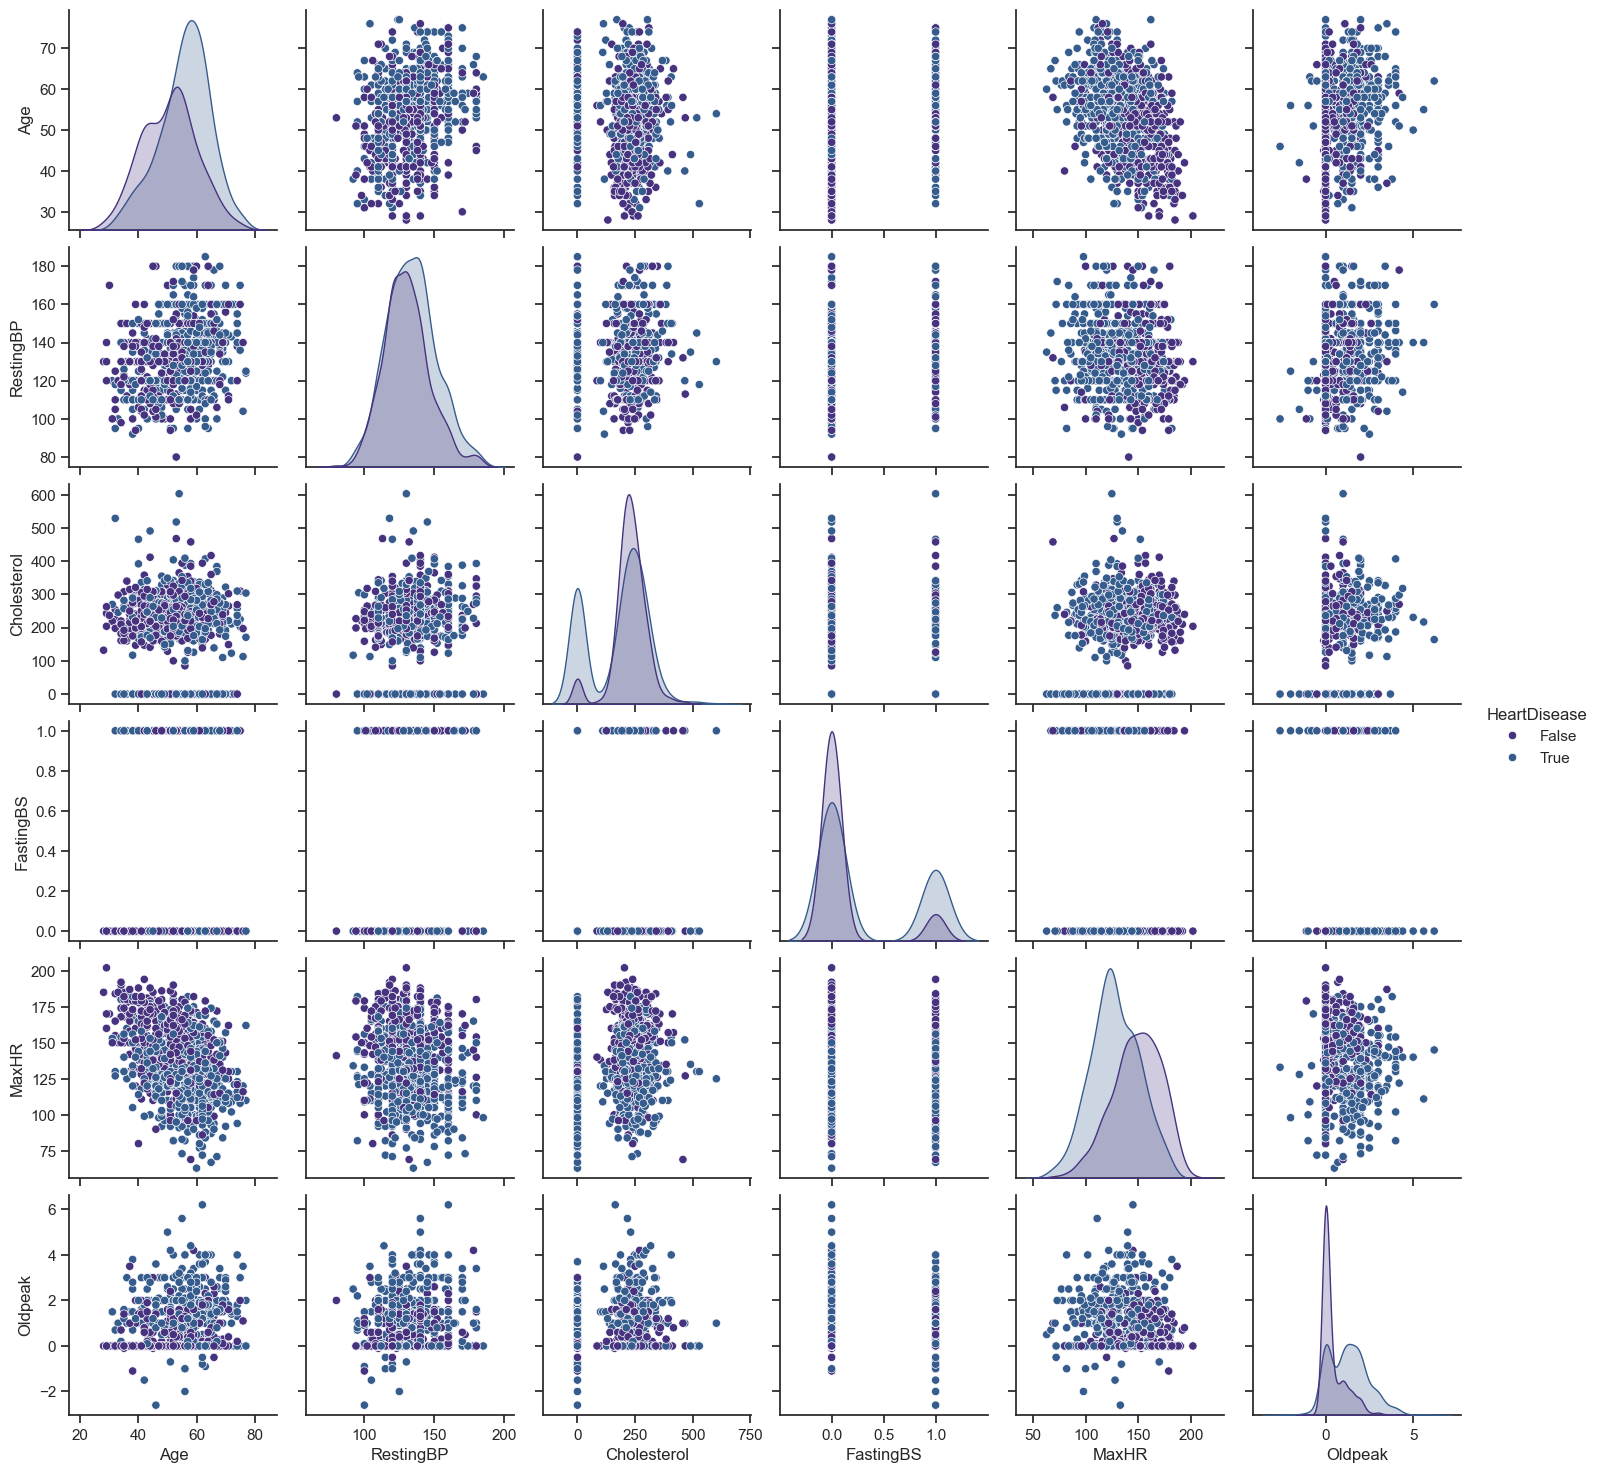

In [156]:
# Visualizing the relation between the numerical values using a pairplot, where the entries are classified by whether a heart disease is present 
additional_column = heart_df['HeartDisease'].copy()
numnum = heart_df.select_dtypes(include=['float64']).copy()
numnum['HeartDisease'] = additional_column
sns.set(style='ticks', palette='viridis')
pairplot = sns.pairplot(numnum, markers='o', hue='HeartDisease')
plt.show()


### b)
i. Having the pairplot, we are interested in more details on the relation between the age of a patient and maximum heart rate. Therefore, create plot that shows the regression line between both features.

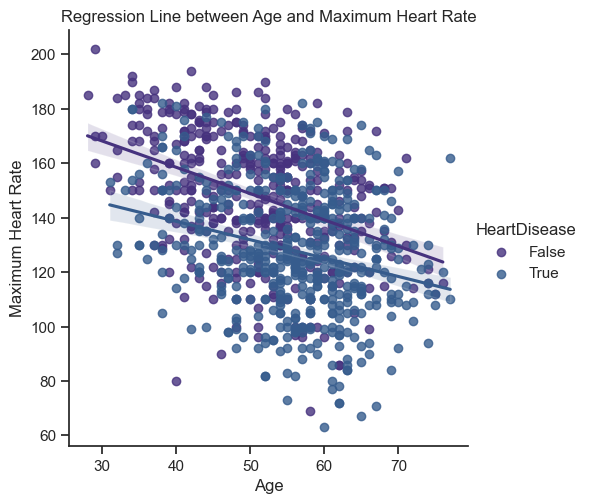

In [158]:
# Plotting age and maximum heart rate with regression line
sns.set(style='ticks', palette='viridis')
#sns.lmplot(x='Age', y='MaxHR', data=heart_df, height=6, aspect=1.5, ci=None, scatter_kws={'s': 50, 'alpha': 0.5}, hue='HeartDisease', markers=['o', 'x'], fit_reg=True)
sns.lmplot(x='Age', y='MaxHR', data=heart_df, hue='HeartDisease', fit_reg=True)

plt.xlabel('Age')
plt.ylabel('Maximum Heart Rate')
plt.title('Regression Line between Age and Maximum Heart Rate')
plt.show()

ii. Given our evaluation from task b-i), we are not sure if Simpson's Paradox occurs or not. Give some short reasoning, and if needed, do some experiment to check whether Simpson's Paradox occurs.

In [66]:
# Potential code for Simpson's Paradox testing
g = sns.FacetGrid(data, col="Group", hue="Group", col_wrap=2, height=5)
g.map(sns.scatterplot, "X", "Y", alpha=.7)

ValueError: Could not interpret value `group` for `hue`. An entry with this name does not appear in `data`.

C:\Users\Rami\AppData\Local\Temp\ipykernel_12800\3900602737.py:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(data=heart_df, x='Age', y='MaxHR', palette='viridis')


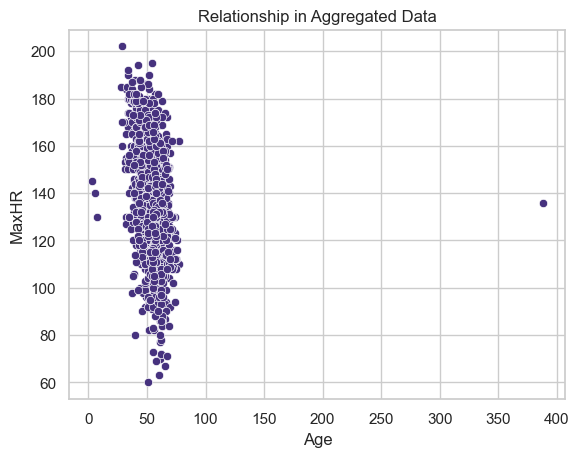

In [64]:
# Potential code for Simpson's Paradox testing
sns.scatterplot(data=heart_df, x='Age', y='MaxHR', palette='viridis')
plt.title('Relationship in Aggregated Data')
plt.show()

__Student Answer:__ Simpsons Paradox does not seem to occur as both categories of heart disease do not seem to have age trend up with maxHR 

### c)
In this task, we want to obtain a deeper understanding of the characteristics of each state of the former categorical or boolean features. Therefore, we create a heatmap that can be used to get a first impression of which value of which feature correlates with each other feature. 

i. Create a dataframe that contains as its columns the feature states and as its index all the column names of `heart_df`. Each entry is the sum of entries that have such a combination of features being true for the one-hot encoded features. For example, given the entries:
| ID | Feature1_True | Feature1_False | Feature2_StateA | Feature2_StateB | Feature2_StateC | Feature3_StateA | Feature3_StateB |
|----|---------------|----------------|-----------------|-----------------|-----------------|-----------------|-----------------|
| 1  | True          | False          | True            | False           | False           | True            | False           |
| 2  | True          | False          | False           | True            | False           | True            | False           |
| 3  | False         | True           | False           | True            | False           | True            | False           |

In this example, we would obtain the following entries as a result:

|                 | Feature1_True | Feature1_False | Feature2_StateA | Feature2_StateB | Feature2_StateC | Feature3_StateA | Feature3_StateB |
|-----------------|---------------|----------------|-----------------|-----------------|-----------------|-----------------|-----------------|
| Feature1_True   | 2             | 0              | 1               | 1               | 0               | 2               | 0               |
| Feature1_False  | 0             | 1              | 0               | 1               | 0               | 1               | 0               |
| Feature2_StateA | 1             | 0              | 1               | 0               | 0               | 1               | 0               |
| Feature2_StateB | 1             | 1              | 0               | 2               | 0               | 2               | 0               |
| Feature2_StateC | 0             | 0              | 0               | 0               | 0               | 0               | 0               |
| Feature3_StateA | 2             | 1              | 1               | 2               | 0               | 3               | 0               |
| Feature3_StateB | 0             | 0              | 0               | 0               | 0               | 0               | 0               |

In [95]:
# Creating the data for the heatmap.
onehot_columns = heart_df1.select_dtypes(include=[bool]).columns
feature_states_dfamerica = pd.DataFrame(index=onehot_columns, columns=onehot_columns)
for column in onehot_columns:
    for index_column in onehot_columns:
        group_counts = heart_df1.groupby([column, index_column]).size().unstack().fillna(0)
        feature_states_dfamerica.loc[column, index_column] = group_counts.iloc[1, 1]


display(feature_states_dfamerica)


,Sex_F,Sex_M,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up,ExerciseAngina_False,ExerciseAngina_True
Sex_F,193.0,0.0,70,61,52,10,46,119,28,7,75,111,150,43
Sex_M,0.0,721.0,426,111,148,36,140,431,150,56,382,283,393,328
ChestPainType_ASY,70,426,496.0,0.0,0.0,0.0,102,283,111,46,317,133,199,297
ChestPainType_ATA,61,111,0.0,172.0,0.0,0.0,22,123,27,3,33,136,155,17
ChestPainType_NAP,52,148,0.0,0.0,200.0,0.0,46,122,32,10,85,105,149,51
ChestPainType_TA,10,36,0.0,0.0,0.0,46.0,16,22,8,4,22,20,40,6
RestingECG_LVH,46,140,102,22,46,16,186.0,0.0,0.0,17,96,73,113,73
RestingECG_Normal,119,431,283,123,122,22,0.0,550.0,0.0,31,265,254,343,207
RestingECG_ST,28,150,111,27,32,8,0.0,0.0,178.0,15,96,67,87,91
ST_Slope_Down,7,56,46,3,10,4,17,31,15,63.0,0.0,0.0,22,41


ii. Next, create the heatmap based on the data from the last subtask. If necessary, improve readability of the visualization.

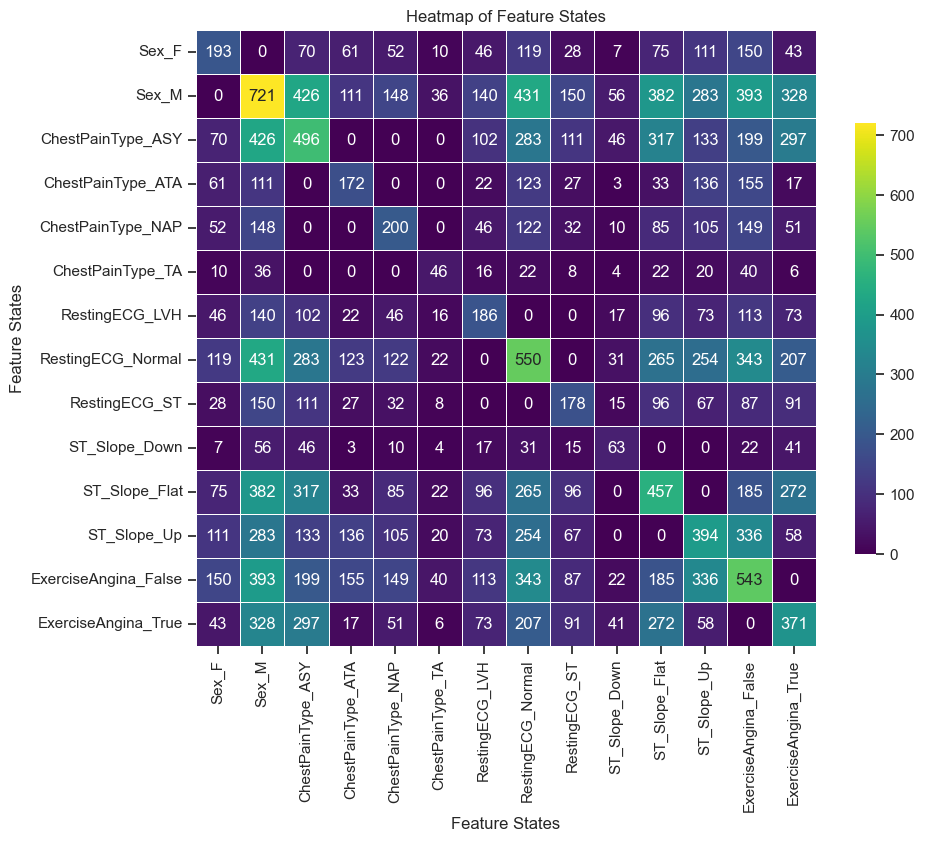

In [96]:
# Visualizing the obtained heatmap
feature_states_dfamerica = feature_states_dfamerica.apply(pd.to_numeric, errors='coerce')
feature_states_dfamerica = feature_states_dfamerica.dropna()
feature_states_df = feature_states_dfamerica.astype(float)

plt.figure(figsize=(10, 8))
sns.heatmap(feature_states_dfamerica, annot=True, fmt=".0f", cmap="viridis", linewidths=.5, cbar_kws={"shrink": 0.7})
plt.xlabel('Feature States')
plt.ylabel('Feature States')
plt.title('Heatmap of Feature States')
plt.show()

Given the heatmap, briefly derive some insights towards the different values of a feature. I.e., you may choose a heart disease being present or not and argue about what correlates for the other features for each value.

__Student Answer:__ _your answer goes here_